In [2]:
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cwd = os.getcwd()
clean_user_data = pd.read_csv(cwd+'\\Data\\user_details_clean.csv', encoding='utf-8')

In [6]:
clean_user_data = clean_user_data.fillna(0)
clean_user_data['Tenure'] = clean_user_data['Tenure'] / 365
clean_user_data = clean_user_data.round({'Tenure': 0})
clean_user_data['Tenure'] = clean_user_data['Tenure'].apply(int)
#bucket the Tenure Groups
clean_user_data['Tenure_Group'] = 'N/A'
clean_user_data.loc[clean_user_data['Tenure'] < 1,'Tenure_Group'] = '< 1 yr'
clean_user_data.loc[(clean_user_data['Tenure'] >= 1) & (clean_user_data['Tenure'] < 4 ), 'Tenure_Group'] = '1 to 3 yrs'
clean_user_data.loc[(clean_user_data['Tenure'] >= 4) & (clean_user_data['Tenure'] < 8 ), 'Tenure_Group'] = '4 to 8 yrs'
clean_user_data.loc[clean_user_data['Tenure'] >= 8,'Tenure_Group'] = '> 8 yrs'
clean_user_data['Tenure_Group'] = clean_user_data['Tenure_Group'].astype(str)
clean_user_data['Tenure'] = clean_user_data['Tenure'].astype(str)

25% --> 1.0
50% --> 2.0
75% --> 4.0
95% --> 8.0


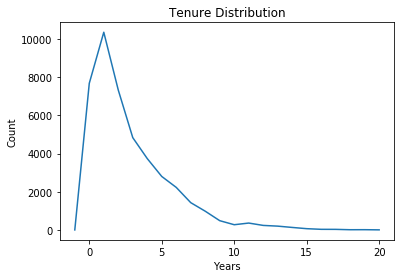

In [7]:
tenure = list(clean_user_data['Tenure'].astype(int).tolist())

nk = Counter(tenure)

x = []
y = []
for k in sorted(nk):
    x.append(k)
    y.append(nk[k])

p_25 = np.percentile(tenure, 25)
median = np.percentile(tenure, 50)
p_75 = np.percentile(tenure, 75)
p_95 = np.percentile(tenure, 95)

print('25% --> '+str(p_25))
print('50% --> '+str(median))
print('75% --> '+str(p_75))
print('95% --> '+str(p_95))
    
plt.plot(x,y)
plt.title('Tenure Distribution')
plt.ylabel("Count")
plt.xlabel("Years")
plt.show()